In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# df = pd.read_csv('annotations/geoff_5_12_2022.csv')
df = pd.read_csv('annotations/geoff_5_16_2022.csv')

In [3]:
df

,dicom_sent_id,dicom_id,sent_id,checkpoint_name,prompt,has_good_recall,has_good_precision,is_intuitive,is_custom_prompt,no_attn_score
0,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,wordmask,Small left pleural effusion is likely.,3,3,3,False,NaN
1,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,baseline,Small left pleural effusion is likely.,3,3,3,False,NaN
2,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,clinicalmask,Small left pleural effusion is likely.,3,3,3,False,NaN
3,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,pretrained,Small left pleural effusion is likely.,4,1,1,False,NaN
4,dicom_7b06a9f9-7fa05d00-3b464e66-8c729c40-0ec1...,7b06a9f9-7fa05d00-3b464e66-8c729c40-0ec1ff52,54197100|10,wordmask,There is evidence of prior left midclavicular ...,1,1,1,False,NaN
...,...,...,...,...,...,...,...,...,...,...
270,dicom_0e41c0c3-e8d38ca6-1816fb2b-c581263d-1572...,0e41c0c3-e8d38ca6-1816fb2b-c581263d-1572385f,53826368|15,noattn,2. Pronounced alveolar opacities in a perihila...,1,1,1,False,0.012591
271,dicom_70146be7-493e5cef-63ce50ad-28d1b378-e735...,70146be7-493e5cef-63ce50ad-28d1b378-e735d4f4,52066024|10,noattn,IMPRESSION: Stable cardiomegaly with mild ede...,2,5,2,False,0.002694
272,dicom_44ec5566-a8ca3ad9-bc23e9bf-d4d2ff08-aa12...,44ec5566-a8ca3ad9-bc23e9bf-d4d2ff08-aa12657b,50703920|0.04,noattn,Bilateral lower lobe opacity is suspicious fo...,3,5,3,False,0.002671
273,dicom_24bec92e-63b01207-fd74aa66-2a8b208f-2722...,24bec92e-63b01207-fd74aa66-2a8b208f-27224dd0,58614235|8,noattn,soft tissue mass in the lower mid to lower me...,1,1,1,False,0.002749


In [4]:
df['count'] = 1

In [5]:
df.groupby(['checkpoint_name', 'has_good_recall']).sum().reset_index()

,checkpoint_name,has_good_recall,has_good_precision,is_intuitive,is_custom_prompt,no_attn_score,count
0,abnormal,1,3,3,0,0.000000,3
1,abnormal,2,16,11,0,0.000000,6
2,abnormal,3,29,24,0,0.000000,10
3,abnormal,4,2,2,0,0.000000,1
4,abnormal,5,18,20,0,0.000000,5
5,baseline,1,28,28,0,0.000000,28
6,baseline,2,22,15,0,0.000000,8
7,baseline,3,12,10,0,0.000000,3
8,baseline,4,14,13,0,0.000000,5
9,baseline,5,24,25,0,0.000000,6


<AxesSubplot:xlabel='has_good_recall', ylabel='count'>

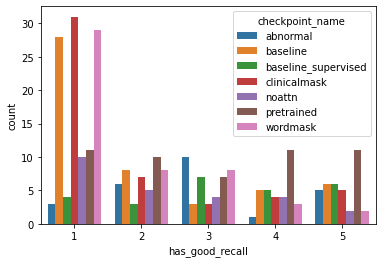

In [6]:
sns.barplot(
    data=df.groupby(['checkpoint_name', 'has_good_recall']).sum().reset_index(),
    x='has_good_recall', y='count', hue='checkpoint_name')

<AxesSubplot:xlabel='has_good_precision', ylabel='count'>

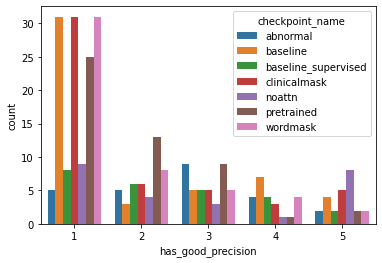

In [7]:
sns.barplot(
    data=df.groupby(['checkpoint_name', 'has_good_precision']).sum().reset_index(),
    x='has_good_precision', y='count', hue='checkpoint_name')

<AxesSubplot:xlabel='is_intuitive', ylabel='count'>

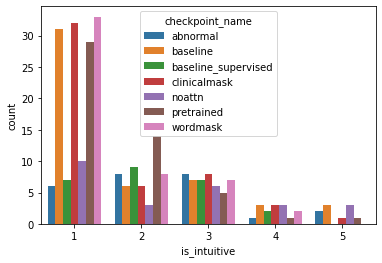

In [8]:
sns.barplot(
    data=df.groupby(['checkpoint_name', 'is_intuitive']).sum().reset_index(),
    x='is_intuitive', y='count', hue='checkpoint_name')

In [9]:
instances = set(df[df.checkpoint_name=='noattn'].dicom_sent_id.tolist())

In [10]:
df[df.apply(lambda r: r.dicom_sent_id in instances, axis=1)].groupby(['checkpoint_name']).mean()

,has_good_recall,has_good_precision,is_intuitive,is_custom_prompt,no_attn_score,count
checkpoint_name,,,,,,
abnormal,2.96,2.72,2.40,0.0,NaN,1.0
baseline,1.96,1.92,1.80,0.0,NaN,1.0
baseline_supervised,3.24,2.44,2.16,0.0,NaN,1.0
clinicalmask,1.76,1.80,1.60,0.0,NaN,1.0
noattn,2.32,2.80,2.44,0.0,0.004331,1.0
pretrained,3.16,2.12,1.84,0.0,NaN,1.0
wordmask,1.84,1.96,1.68,0.0,NaN,1.0


In [11]:
df[df.apply(lambda r: r.checkpoint_name in [
    'pretrained', 'baseline', 'wordmask', 'clinicalmask'], axis=1)].groupby(['checkpoint_name']).mean()

,has_good_recall,has_good_precision,is_intuitive,is_custom_prompt,no_attn_score,count
checkpoint_name,,,,,,
baseline,2.06,2.00,1.82,0.0,NaN,1.0
clinicalmask,1.90,1.90,1.70,0.0,NaN,1.0
pretrained,3.02,1.84,1.62,0.0,NaN,1.0
wordmask,1.82,1.76,1.56,0.0,NaN,1.0


In [13]:
df[df.checkpoint_name == 'noattn'].no_attn_score.corr(df[df.checkpoint_name == 'noattn'].is_intuitive)

-0.4346606265219439